<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/21_Advertisement_Click_Forecasting_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b63; overflow:hidden"><b> Advertisement Click Forecasting Using Logistic Regression </b></div>



### Problem Statement

The company aims to explore customer behavior by identifying which users are most likely to click on their advertisements.

### Objective

Our goal is to analyze customer data and create a model that predicts ad engagement.

### Customer Data Overview

**Inputs:**
- **Name**: Customer’s name.
- **E-mail**: Customer’s email address.
- **Country**: Customer’s country of residence.
- **Time on Facebook**: Duration of time the customer spends on Facebook.
- **Estimated Salary**: Salary estimate derived from various factors.

**Outputs:**
- **Click**:
  - `1`: Customer clicked on the ad.
  - `0`: Customer did not click on the ad.

### Goal

Develop a predictive model to determine which customers are likely to engage with the advertisement.


#

# *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#

#  *2.Import Dataset*

In [ ]:
encoding = 'ISO-8859-1'
df=pd.read_csv('Logisitic Regression/Facebook_Ads_2.csv', encoding=encoding)
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


#

# *3.Data Analysis and Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [ ]:
df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


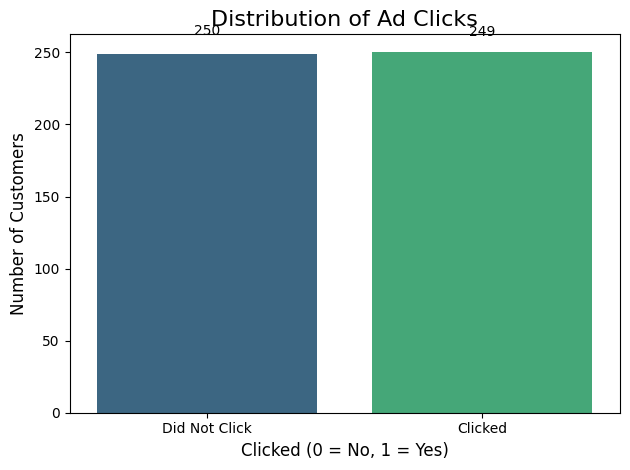

Clicked
1    250
0    249
Name: count, dtype: int64


In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.barplot(
    x=df['Clicked'].value_counts().index,
    y=df['Clicked'].value_counts().values,
    palette='viridis'
)

plt.title('Distribution of Ad Clicks', fontsize=16)
plt.xlabel('Clicked (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Did Not Click', 'Clicked'], fontsize=10)
plt.yticks(fontsize=10)

for index, value in enumerate(df['Clicked'].value_counts().values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
print(df['Clicked'].value_counts())

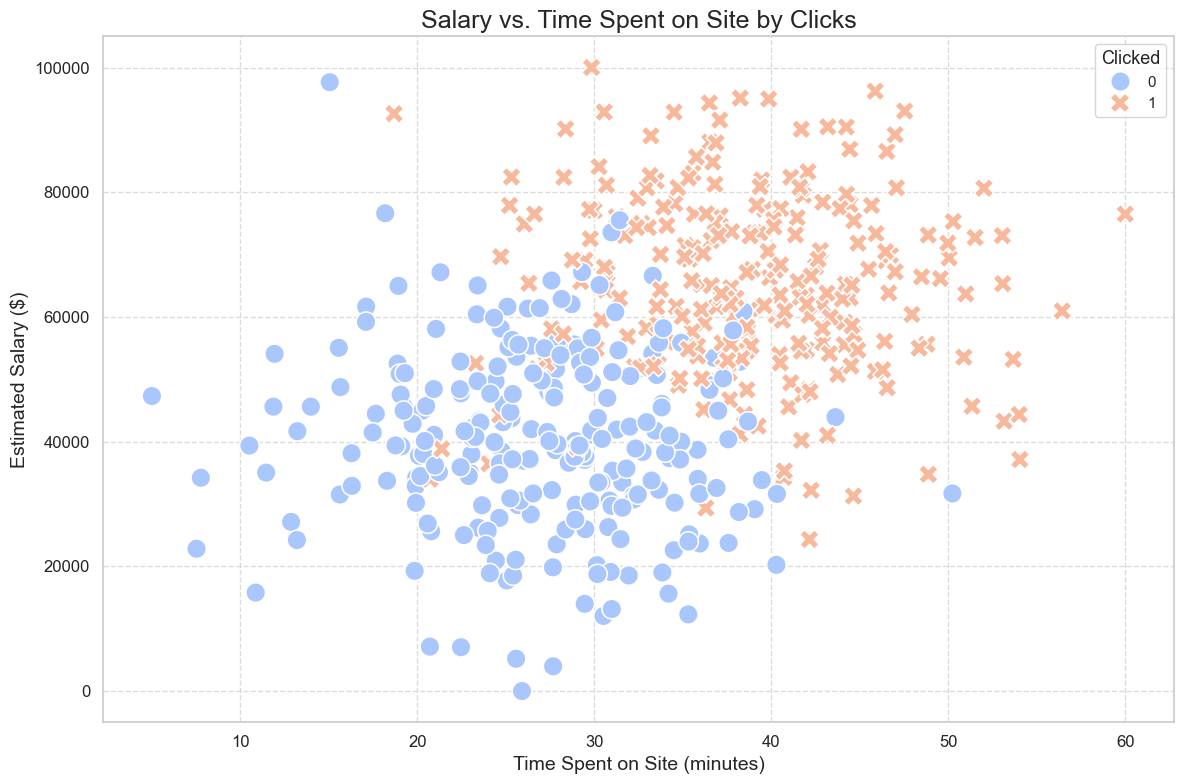

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x=df['Time Spent on Site'], y=df['Salary'], hue=df['Clicked'], palette='coolwarm', style=df['Clicked'],s=200,alpha=1)
plt.title('Salary vs. Time Spent on Site by Clicks', fontsize=18)
plt.xlabel('Time Spent on Site (minutes)', fontsize=14)
plt.ylabel('Estimated Salary ($)', fontsize=14)
plt.legend(title='Clicked', title_fontsize='13', fontsize='11', loc='best')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

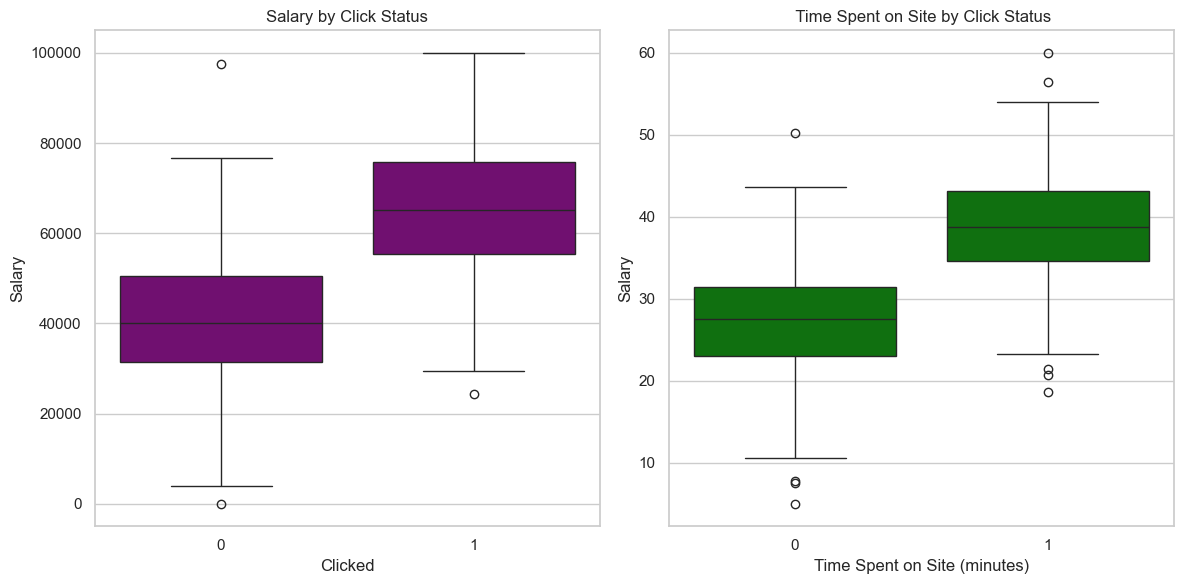

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Clicked', y='Salary', data=df, color='purple')
plt.title('Salary by Click Status')
plt.xlabel('Clicked')
plt.ylabel('Salary')

plt.subplot(1, 2, 2)
sns.boxplot(x='Clicked', y='Time Spent on Site', data=df, color='green')
plt.title(' Time Spent on Site by Click Status')
plt.xlabel('Time Spent on Site (minutes)')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()

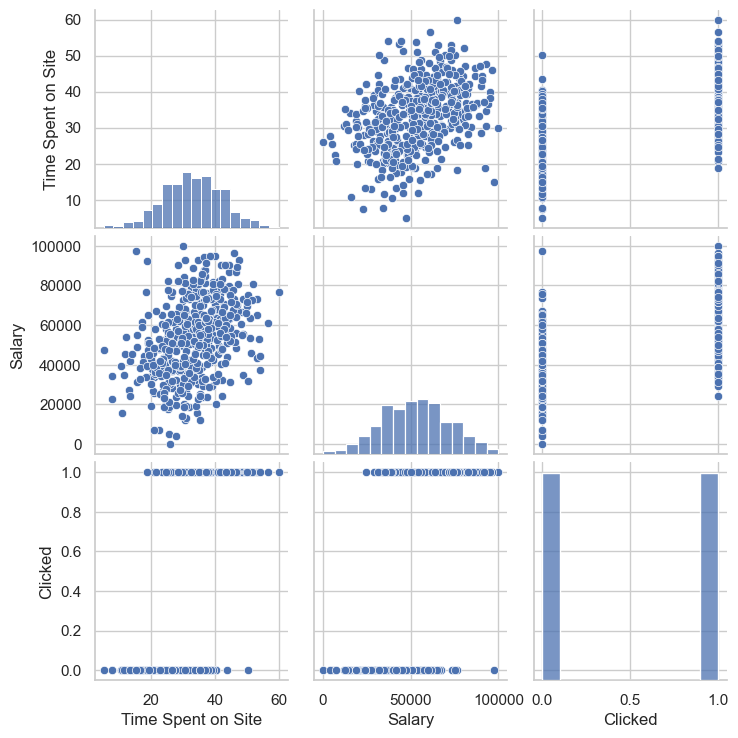

In [ ]:
sns.pairplot(df)

#

# *4. Split Data to Train and Test*

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Names', 'emails', 'Country','Clicked'], axis=1)
Y=df['Clicked']


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-7.99457658e-01,  1.28257713e-01],
       [-5.10286870e-02,  1.37859159e+00],
       [-1.31666684e+00, -6.21944817e-01],
       [ 2.32223270e+00, -8.30443624e-01],
       [ 1.46195572e-01, -8.19280959e-01],
       [ 2.09908496e+00,  1.46259598e+00],
       [ 1.09531908e+00,  4.75030899e-01],
       [-7.96458904e-01, -1.21483411e+00],
       [ 8.55264296e-01, -9.81324726e-01],
       [-3.55476114e-01, -6.21930555e-01],
       [ 3.87487311e-02,  6.48400206e-02],
       [ 1.77112538e-01, -1.19530208e+00],
       [-8.36398567e-01, -4.81440402e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 5.27406027e-01,  6.21976462e-01],
       [-8.64648371e-01, -1.85222918e+00],
       [ 8.98997888e-01, -1.81000774e-01],
       [-8.97110238e-01, -7.59750031e-01],
       [ 1.75384005e+00, -9.55319376e-01],
       [-5.59287751e-01, -6.60247498e-02],
       [-1.73917217e+00,  4.62029789e-01],
       [-8.05159264e-01,  3.86803184e-02],
       [ 1.02580543e+00, -1.09023371e+00],
       [ 4.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(399, 2) (100, 2) (399,) (100,)


#

# *5.Model Training*

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

#

# *6.Evaluation*

In [ ]:
y_pred=model.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

<Axes: >

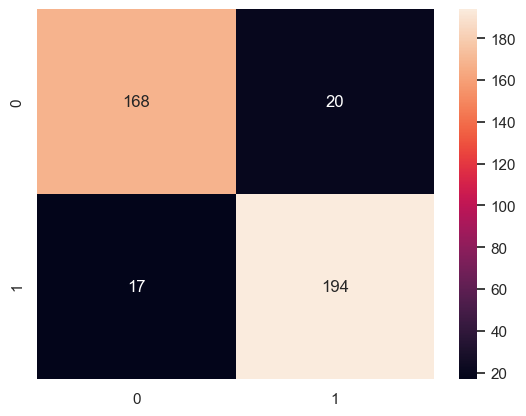

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(Y_train,y_pred)
sns.heatmap(cm,annot=True, fmt='d')

<Axes: >

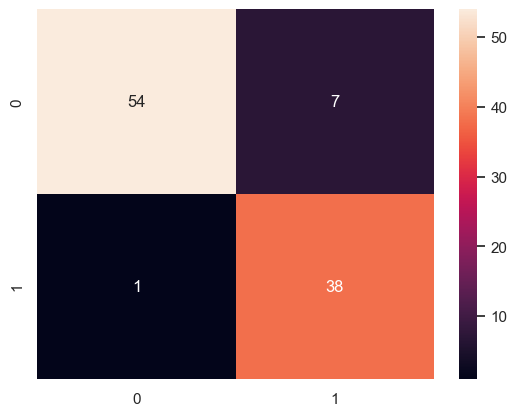

In [ ]:
y_pred_test=model.predict(X_test)
cm=confusion_matrix(Y_test,y_pred_test)
sns.heatmap(cm,annot=True, fmt='d')

In [ ]:
y_pred_test=model.predict(X_test)
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



(-3.787379255660188, 3.482620744339657)

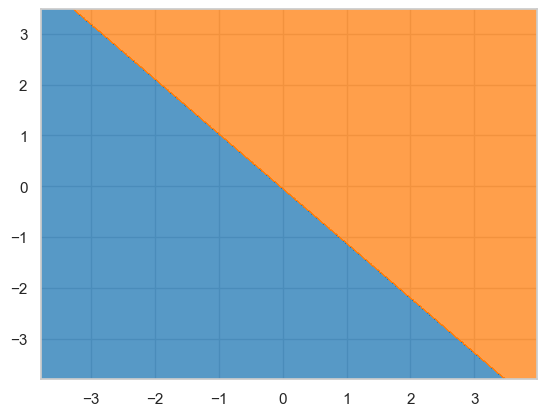

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap, TABLEAU_COLORS
X_set, y_set = X_train, Y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

colors = list(TABLEAU_COLORS.values())
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap([colors[0], colors[1]]))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_set, y_set = X_train, Y_train


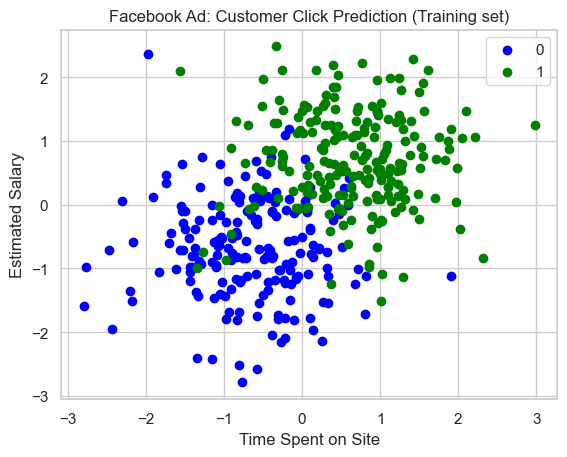

In [ ]:

X_set, y_set = X_train, Y_train
unique_classes = np.unique(y_set)

colors = ['blue', 'green']
cmap = ListedColormap(colors[:len(unique_classes)])

for i, j in enumerate(unique_classes):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=j)

plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

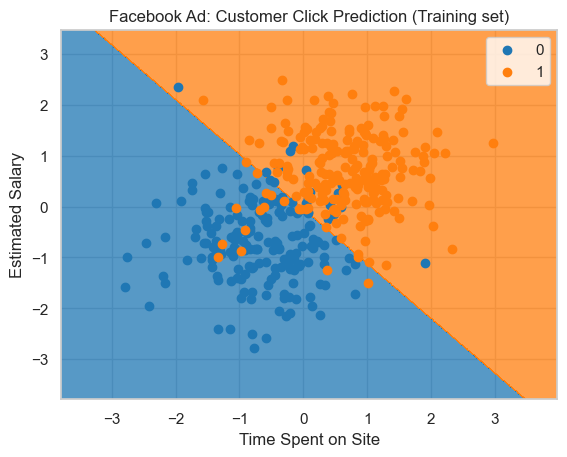

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap([colors[0], colors[1]]))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(unique_classes):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=j)

plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()